# Path Configuration

In [1]:
import os
import sys
import argparse

root = "../"*3
src_path = os.path.join(root, "kyoka")
sample_path = os.path.join(root, "sample")
sys.path.append(root)
sys.path.append(src_path)
sys.path.append(sample_path)

import logging as log
log.basicConfig(format='[%(levelname)s] %(message)s', level=log.DEBUG)

from kyoka.algorithm.montecarlo.montecarlo import MonteCarlo
from kyoka.algorithm.td_learning.sarsa import Sarsa
from kyoka.algorithm.td_learning.q_learning import QLearning
from kyoka.algorithm.td_learning.sarsa_lambda import SarsaLambda
from kyoka.algorithm.td_learning.q_lambda import QLambda

from kyoka.policy.epsilon_greedy_policy import EpsilonGreedyPolicy
from kyoka.finish_rule.watch_iteration_count import WatchIterationCount

from sample.maze.maze_domain import MazeDomain
from sample.maze.maze_keras_value_function import MazeKerasValueFunction
from sample.maze.maze_helper import MazeHelper
from sample.maze.maze_performance_logger import MazePerformanceLogger
from sample.maze.maze_transformer import MazeTransformer

Using Theano backend.


# Define Const for Performance Test

# Setup Global Item for Performance Test

In [15]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt

maze_file_path = lambda maze_type: "../script/%s.txt" % maze_type
transform_file_path = lambda maze_type: "../script/%s_transformed.txt" % maze_type

def gen_callbacks(maze_type, transform_timing):
    callbacks = [MazePerformanceLogger()]
    if maze_type in ["blocking", "shortcut"]:
        transfomer = MazeTransformer()
        transfomer.set_transformation(transform_timing, transform_file_path(maze_type))
        callbacks.append(transfomer)
    return callbacks

def run_performance_test(maze_type, rl_algo, epsilon, test_length, transform_timing):
    watch_iteration = WatchIterationCount(target_count=test_length, log_interval=1000)
    finish_rules = [watch_iteration]
    domain = MazeDomain()
    domain.read_maze(maze_file_path(maze_type))
    value_func = MazeKerasValueFunction(domain)
    value_func.setUp()
    policy = EpsilonGreedyPolicy(domain, value_func, eps=epsilon)
    callbacks = gen_callbacks(maze_type, transform_timing)
    [rl_algo.set_gpi_callback(callback) for callback in callbacks]
    rl_algo.GPI(domain, policy, value_func, finish_rules)
    return callbacks[0].step_log, callbacks[0].policy_log

def visualize_maze(maze_type):
    domain = MazeDomain()
    domain.read_maze(maze_file_path(maze_type))
    print domain.get_maze_shape()
    print MazeHelper.visualize_maze(domain.maze)

def visualize_step_transition(step_log):
    print "minimum step => %d" % min(step_log)
    plt.plot(step_log, label="step")
    plt.xlabel("GPI iteration")
    plt.ylabel("step")
    plt.show()
    
def visualize_policy_transition(step_log, policy_log, sampling_interval):
    sampled_log = [(item[0]+1, item[1]) for item in enumerate(policy_log) if (item[0]+1)%sampling_interval==0]
    for iteration, log in sampled_log:
        minimum_step = min(step_log[iteration-sampling_interval:iteration])
        print "After %d th iteration (minimum step => %d)" % (iteration, minimum_step)
        print log
        print

# DynaMaze

In [3]:
MAZE_TYPE = "dyna"
TRANSFORM_TIMING = 0
visualize_maze(MAZE_TYPE)

(6, 9)
-------XG
--X----X-
S-X----X-
--X------
-----X---
---------


## Sarsa

minimum step => 14


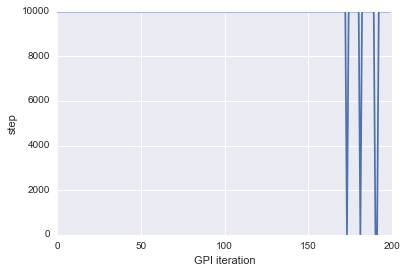

After 20 th iteration (minimum step => 10000)
v^<v<<v>G
<<vvv>v>^
^>->v>v>^
v^^>>>>>^
<<>>^^v>^
^>v^>>v<^

After 40 th iteration (minimum step => 10000)
vv>^>^<>G
<<v^v^v>^
^<->vvv>^
^<^>>>>>^
^>>^^^^^^
>>>^<>^>-

After 60 th iteration (minimum step => 10000)
>>>^<v<>G
>^v^>v<>^
v^->>vv>^
<<^v>>>>^
^>>v<>^^^
>v>^>-^^^

After 80 th iteration (minimum step => 10000)
>^<<v>->G
^^v>v<v>^
vv-vv>>>^
<<^<<>>>^
^^v^^>^^^
>>v<^<^>-

After 100 th iteration (minimum step => 10000)
v^>^>>->G
<<v^vvv>^
^v->>>v>^
vv^v^>>>^
>v>^<>>^^
>^<^>->v<

After 120 th iteration (minimum step => 10000)
v>-v>^<>G
v<v<<vv>^
<<-^>vv>^
^^^>>>>>^
<>>^^><>^
^<>>>>^>^

After 140 th iteration (minimum step => 10000)
>^<<v>v>G
>^v>v>v>^
<^-v^>v>^
^v^<>>>>^
>^>^v>^^^
>^v>>-^^^

After 160 th iteration (minimum step => 10000)
>^>^vv->G
<^v>>vv>^
^v->>>v>^
>>^>>>>>^
v^vv^>>>^
->v<<>^^^

After 180 th iteration (minimum step => 14)
v>>vvvv>G
<<vvvvv>^
^v->>vv>^
>>^>>>>>^
vv>>^>^>^
>v>^^>^>^

After 200 th iteration (minimum ste

In [19]:
TEST_LENGTH = 200
EPSILON = 0.3
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=Sarsa(alpha=0.1, gamma=0.7),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=20)

minimum step => 10000


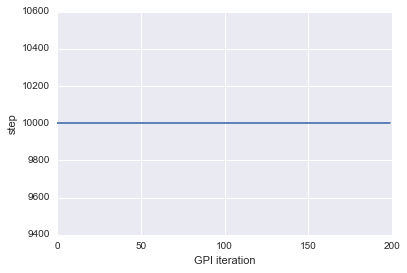

After 20 th iteration (minimum step => 10000)
-v>>v^v>G
>>v>^>>>^
>^-vvv^>^
v^^>v<>v^
<>^<^v>><
^>^<>>v^^

After 40 th iteration (minimum step => 10000)
-<>^<>->G
^>v^>>v>^
^^->v>v>^
>>^>>>>>^
vv>>^^>^^
>v<^v<>^<

After 60 th iteration (minimum step => 10000)
vv>>^<v>G
<<v>v>v>^
^<-vv<v>^
^v^><<>>^
v<v^^^>^^
->v<<>>^^

After 80 th iteration (minimum step => 10000)
v^>^vv->G
<vv>><<>^
>>-v^^v>^
^v^<<>>>^
>v<^v^^>^
>^<>v<v>^

After 100 th iteration (minimum step => 10000)
>^<v>^<>G
v^v><^v>^
<<-^^vv>^
^^^>>>>>^
v>v<^^v>^
->v<^>v<^

After 120 th iteration (minimum step => 10000)
->-<>^<>G
^<v>vvv>^
^v->>v<>^
>v^<>^>>^
>>v^>>>>^
->v<^>>^^

After 140 th iteration (minimum step => 10000)
-v-<^>->G
>>v<>v^>^
>^-^>vv>^
^^^v>>>>^
>v>vv>>^^
>v>>>>>v^

After 160 th iteration (minimum step => 10000)
-<>^>^<>G
^^v^>v>>^
<<->>^<>^
^<^>^^>>^
v>^v^>>>^
-<>v<>^>-

After 180 th iteration (minimum step => 10000)
v<-v>>->G
<<v<<vv>^
^v-^>vv>^
>>^>>>>>^
^^vv^>>^^
^>v<>>>^^

After 200 th iteration (minimum 

In [20]:
TEST_LENGTH = 200
EPSILON = 0.7
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=Sarsa(alpha=0.1, gamma=0.7),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=20)

# QLearning

minimum step => 14


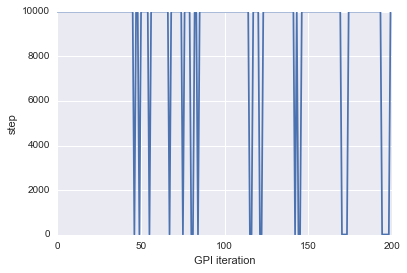

After 20 th iteration (minimum step => 10000)
v>-<^<v>G
>>^<<vv>^
<^-^<>v>^
^v^^^>>>^
vvv^vv^>^
->v<v<>v^

After 40 th iteration (minimum step => 10000)
>^>vv<v>G
v^>>v<v>^
v<-v^vv>^
<<^>>>>>^
^<>>>v>>^
^v>^>-<^^

After 60 th iteration (minimum step => 14)
>v>^<>->G
>>v^vv^>^
v^->>vv>^
<v^>>>>>^
v>>>^^^>^
-<^^^<^>^

After 80 th iteration (minimum step => 14)
>^<<>>->G
>^vv>vv>^
^^->vvv>^
>v^>>>>>^
>>>>^>^>^
^^^>^>^>^

After 100 th iteration (minimum step => 14)
-<>vv^<>G
^<>>vvv>^
v<-v>>v>^
vv^>>>>>^
<>^^^^^^^
^>^^^>^>^

After 120 th iteration (minimum step => 14)
>>-<vv<>G
^vvv>vv>^
>>-v>vv>^
v^^>>>>>^
v>>^^^^^^
-<^>>-^>^

After 140 th iteration (minimum step => 14)
-<>^>v<>G
v^v>>vv>^
<<-vv>v>^
^v^>>>>>^
>>>^^>^>^
->>>v>^>^

After 160 th iteration (minimum step => 14)
vv>^>^<>G
>>v>>vv>^
v^-<>>v>^
<<^>>>>>^
^>><^^>^^
^^^^<>>^^

After 180 th iteration (minimum step => 14)
>>>v>^<>G
<^v>vvv>^
^^-v>>v>^
vv^>>>>>^
>>>>>>v^^
^>>v^>v<^

After 200 th iteration (minimum step => 14)
>>->v>->G

In [21]:
TEST_LENGTH = 200
EPSILON = 0.3
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=QLearning(alpha=0.1, gamma=0.7),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=20)

minimum step => 14


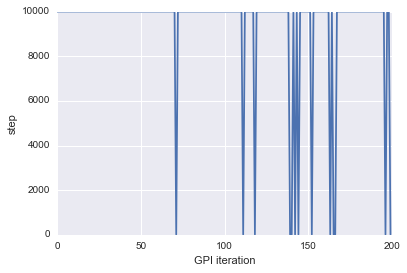

After 20 th iteration (minimum step => 10000)
>^<>^<v>G
<^v>^<>>^
^^-<^vv>^
vv^^>v>>^
>><<>^>^^
-^v<>>>>^

After 40 th iteration (minimum step => 10000)
vv>^v>v>G
>>vv>>v>^
<^-<<>v>^
^<^^>>>>^
v<>v^>>>>
-<>v<>^^^

After 60 th iteration (minimum step => 10000)
>^>v>vv>G
<^v<>vv>^
^<-v>>v>^
vv^<>>>>^
<>>>>>>>^
^>>v^>^^^

After 80 th iteration (minimum step => 14)
-v>v>^v>G
vvv<<vv>^
<v-^>>v>^
>>^^>>>>^
^^>^^>^>^
>>>>>>^>^

After 100 th iteration (minimum step => 10000)
>v<vvvv>G
vvv>vvv>^
<<->>>v>^
^v^<>>>>^
>v>^v>^>^
>>v>v>>v^

After 120 th iteration (minimum step => 14)
v>-<>>v>G
<<v>>vv>^
^>->>>v>^
vv^>>>>>^
v>v^^>^>^
->>>>>^>^

After 140 th iteration (minimum step => 14)
>>>>vvv>G
^^vvv>v>^
>v->vvv>^
>v^>>>>>^
>>>^^^>^^
>^^^>>>>^

After 160 th iteration (minimum step => 14)
v>>>^>v>G
<<v^>vv>^
^v->>>v>^
<<^>>>>>^
^v>>^>>>^
>v>^>>^^^

After 180 th iteration (minimum step => 14)
>^<v>^v>G
>^v>>vv>^
>v-v>>v>^
vv^>>>>>^
>v>^vv^^^
>v<>>-<^^

After 200 th iteration (minimum step => 14)
->-

In [22]:
TEST_LENGTH = 200
EPSILON = 0.7
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=QLearning(alpha=0.1, gamma=0.7),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=20)

# SarsaLambda

In [26]:
TEST_LENGTH = 200
EPSILON = 0.3
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=SarsaLambda(alpha=0.1, gamma=0.9),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=20)

In [ ]:
TEST_LENGTH = 200
EPSILON = 0.7
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=SarsaLambda(alpha=0.1, gamma=0.7),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=20)

# QLambda

minimum step => 14


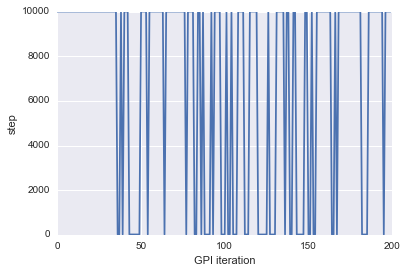

After 20 th iteration (minimum step => 10000)
-<>>>vv>G
^vv>>vv>^
vv->vvv>^
>v^>>>>>^
>>^>^>^>^
>^^^^>^>^

After 40 th iteration (minimum step => 14)
>>>vvvv>G
^^vvvvv>^
^^->>vv>^
vv^>>>>>^
>>>^^^^>^
^>^^>>>>^

After 60 th iteration (minimum step => 14)
>v>>vvv>G
>vvv>vv>^
>>->>>v>^
>^^>>>>>^
v>>^^>^^^
->>v<>^>^

After 80 th iteration (minimum step => 14)
>^>v>v->G
^^v<<vv>^
<v-v>vv>^
>v^>>>>>^
>>>^^>>^^
^^^^>>^^^

After 100 th iteration (minimum step => 14)
>^>^>>v>G
v^vvv>v>^
vv->vvv>^
>v^>>>>>^
>>>>^>>^^
>>>^^>^^^

After 120 th iteration (minimum step => 14)
>^>^<vv>G
^^vv>vv>^
vv->>>v>^
<v^>>>>>^
>>>>^^^>^
>>^^^>^^^

After 140 th iteration (minimum step => 14)
-<>vv>v>G
^^v>>>>>^
>v-vv>v>^
>v^>>>>>^
>>>^^>>^^
>v^^^>^>-

After 160 th iteration (minimum step => 14)
>>>v>>->G
^^v>>vv>^
>v-vv>v>^
>>^>>>>>^
<^>^^^^>^
^>v>^>^>^

After 180 th iteration (minimum step => 14)
->-vvvv>G
vvv>>vv>^
<<->>vv>^
^<^>>>>>^
^>>>^^^^^
>v^>^>^>^

After 200 th iteration (minimum step => 14)
>v>>vvv>G
>>

In [24]:
TEST_LENGTH = 200
EPSILON = 0.3
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=QLambda(alpha=0.1, gamma=0.7),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=20)

minimum step => 14


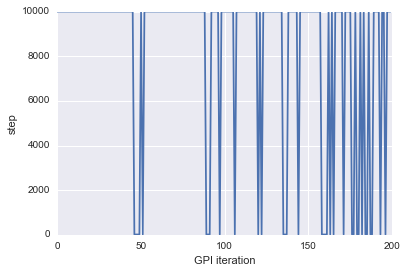

After 20 th iteration (minimum step => 10000)
v>-v>^v>G
>>vvv>v>^
^^->v>v>^
>>^>>>>>^
^>>v^>>>^
-^>>>>^^^

After 40 th iteration (minimum step => 10000)
>>>>vvv>G
v^v>>>v>^
<<->vvv>^
^^^>>>>>^
v^v>^^^^^
-<v>^>^^^

After 60 th iteration (minimum step => 14)
>^>^>>v>G
^^vvvvv>^
^v->>>v>^
vv^v>>>>^
>>>>>>>>^
-^^^^>>^^

After 80 th iteration (minimum step => 10000)
vv>v>vv>G
<<vv>vv>^
^<-vvvv>^
vv^>>>>>^
>>^^^>>^^
>>^^^>v>^

After 100 th iteration (minimum step => 14)
vv>vv>->G
>>v>v>^>^
<^->v>v>^
>v^>>>>>^
>v>>^^>>^
>^>^^>>^^

After 120 th iteration (minimum step => 16)
>>>v>>v>G
^^v<vvv>^
<v-v>>v>^
vv^>>>>>^
>>>>^>^^^
>>>>>-^^^

After 140 th iteration (minimum step => 14)
v>>>>vv>G
<<v>>vv>^
^^->v>v>^
>v^>>>>>^
>>>>^^^>^
>>>v^>>>^

After 160 th iteration (minimum step => 14)
>>-v>vv>G
>^v>>vv>^
>v->>vv>^
>v^>>>>>^
>>>>^^^^^
^>^>>>^^^

After 180 th iteration (minimum step => 14)
>>>v>>v>G
<^v>vvv>^
vv->>vv>^
>v^>>>>>^
>>>^^>>>^
>>>v>>^^^

After 200 th iteration (minimum step => 14)
>>>vvv

In [25]:
TEST_LENGTH = 200
EPSILON = 0.7
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=QLambda(alpha=0.1, gamma=0.7),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=20)